# COVID-19

## 1. Libraries

In [ ]:
!pip install pandas_bokeh

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import matplotlib.dates as mdates
plt.style.use('ggplot')
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec
import pandas_bokeh
pandas_bokeh.output_notebook()
import warnings
warnings.filterwarnings("ignore") 

Loading BokehJS ...

## 2. Functions and Dictionaries

In [135]:
# Plot Confirmed, Recovered and Deaths by country
def plot_country(country,log_scale=False,size=(12,6)):
    fig, ax = plt.subplots(figsize=size)
    ax.plot(data.loc[country,['Confirmed']],label='Confirmed',c='dodgerblue')
    ax.plot(data.loc[country,['Recovered']],label='Recovered',c='mediumseagreen')
    ax.plot(data.loc[country,['Deaths']],label='Deaths',c='crimson')
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    if log_scale == True:
        ax.set_yscale('log') # Log Scale
    ax.legend(ncol=3)
    plt.title(country);
# Renaming Countries
def rename(dataframe,dictionary):
    for key, value in dict_countries.items():
        for val in value:
            dataframe['Country'] = dataframe['Country'].str.replace(val,key)
# Plot Cumulative Number of Deaths
def cum_death(top_country_list,log_scale=True,size=(12,6)):
    x = list(range(21))
    y = [10*(1+0.33)**num for num in x]
    jet= plt.get_cmap('jet')
    colors = iter(jet(np.linspace(0,1,10)))
    fig, ax = plt.subplots(figsize=size)
    for c in top_country_list:
        my_color = next(colors)
        ax.plot(data.loc[c].query('Deaths>=10')['Deaths'].values,label=c,marker=".",color=my_color)
        ax.text(len(data.loc[c].query('Deaths>=10')['Deaths'].values.tolist()),data.loc[c].query('Deaths>=10')['Deaths'].values.tolist()[-1],c,color=my_color,weight="bold",family="monospace")
    if log_scale == True:
        ax.set_yscale('log')
    ax.set_yticks([20, 50, 100, 200, 500, 1000,2000,3000])
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.plot(x,y,'--',color='black',alpha=0.5)
    plt.text(len(x),y[-1],'33% Daily Increase',color='grey',weight="bold",family="monospace")
    plt.title('Cumulative Number of Deaths, by number of days since 10th death');

In [136]:
dict_countries = {'United States':['US'],
                  'United Kingdom':['UK','Jersey','Guernsey'],
                  'China':['Mainland China'],
                  'Macao':['Macau'],
                  'Korea, Republic of':['South Korea','Korea, South'],
                  'Korea, North':['North Korea'],
                  'Russian Federation':['Russia'],
                  'Iran, Islamic Republic of':['Iran'],
                  'Macedonia':['North Macedonia'],
                  'Moldova, Republic of':['Moldova'],
                  'Cote d\'Ivoire':['Ivory Coast'],
                  'Holy See (Vatican City State)':['Holy See'],
                  'Congo, The Democratic Republic of the':['Congo (Kinshasa)','Republic of the Congo'],
                  'Congo':['Congo (Brazzaville)'],
                  'Brunei Darussalam':['Brunei'],
                  'Czech Republic':['Czechia'],
                  'Palestinian Territory':['occupied Palestinian territory'],
                  'Swaziland':['Eswatini'],
                  'Netherlands':['Curacao'],
                  'Serbia':['Kosovo'],
                  'Tanzania, United Republic of':['Tanzania'],
                  'Bahamas':['The Bahamas'],
                 
                 }

## 3. Data

In [137]:
# Paths
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
files = []
# Dates
start_date = date(2020,1,22) # First Report
end_date = date.today() - timedelta(days=1)# Today
delta = end_date - start_date # Days from the first report
# Files
for i in range(delta.days+1):
    date = start_date + timedelta(days=i)
    files.append(date.strftime('%m-%d-%Y'))
# Bug 13/03/2020
df = pd.DataFrame()
for f in files:
    if f != '03-13-2020': # there is a bug in this report
        df_aux = pd.read_csv(path+f+'.csv')
        df_aux['Date'] = pd.to_datetime(f)
        df = pd.concat([df,df_aux])
    else:
        df_aux = pd.read_csv(path+f+'.csv')
        df_aux.loc[df_aux['Country/Region']!='China',['Last Update']] = df_aux[df_aux['Country/Region'] != 'China']['Last Update'].str.replace('-11T','-13T')    
        df_aux['Date'] = pd.to_datetime(f)
        df = pd.concat([df,df_aux])      
# Renaming
df.rename(columns={'Country/Region':'Country'},inplace=True)
df.rename(columns={'Province/State':'Province'},inplace=True)
rename(df,dict_countries)
# Provinces
df.loc[df['Province']=='Hong Kong',['Country']] = 'Hong Kong'
df.loc[df['Province']=='Macau',['Country']] = 'Macao'
df.loc[df['Province']=='Taiwan',['Country']] = 'Taiwan'
df.loc[df['Country'].str.startswith('Tai'),['Country']] = 'Taiwan'

### 3.1 Data Grouped by Country and Date

In [138]:
data = df.groupby(['Country','Date'])['Confirmed','Recovered','Deaths'].sum()

## 4. Plots

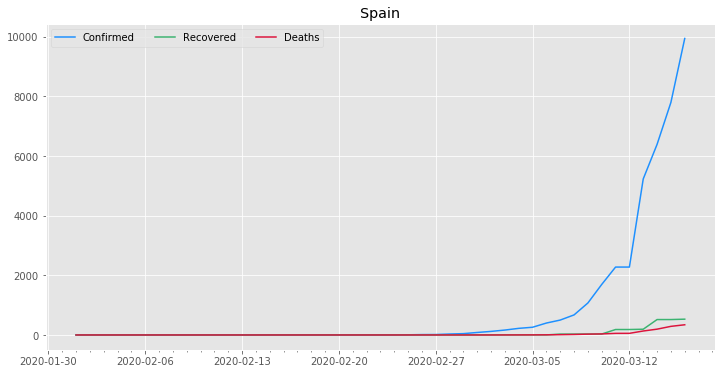

In [139]:
plot_country(country='Spain',log_scale=False)

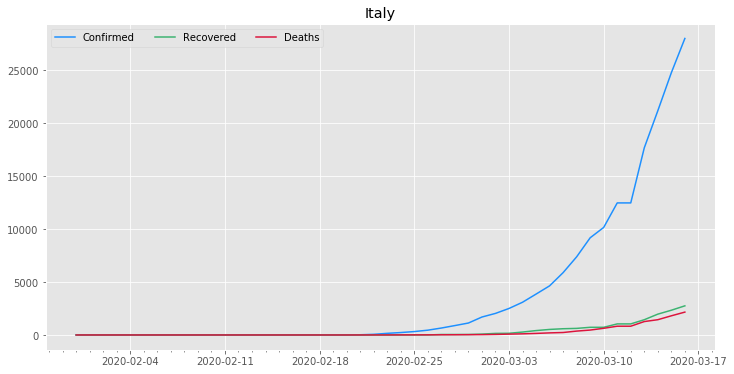

In [140]:
plot_country(country='Italy',log_scale=False)

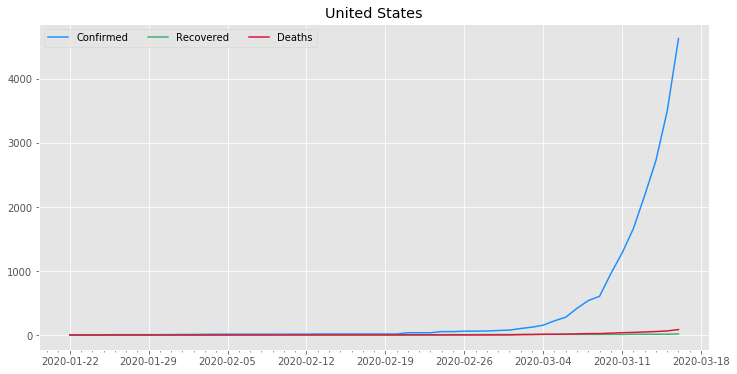

In [141]:
plot_country(country='United States',log_scale=False)

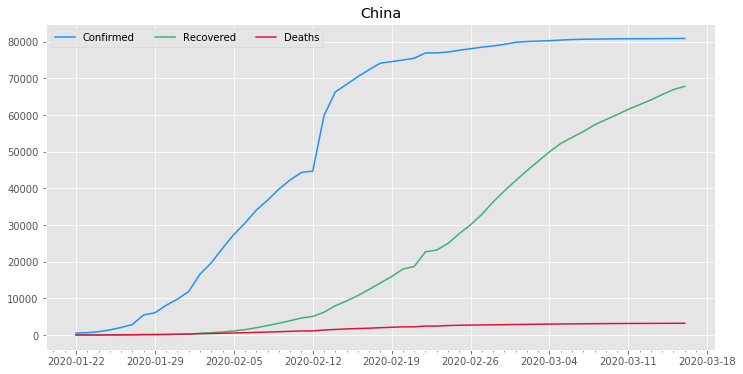

In [142]:
plot_country(country='China',log_scale=False)

## 5. TORP COVID-19 

In [143]:
# Data from Last Report by Country
data_last_report = data.loc[data.index.get_level_values(1) == datetime.strptime(files[-1],'%m-%d-%Y')]
# TOP Country List by Confirmed Cases
top_list = data_last_report.sort_values(by='Confirmed',ascending=False)['Confirmed'][:10].index.get_level_values(0).tolist()

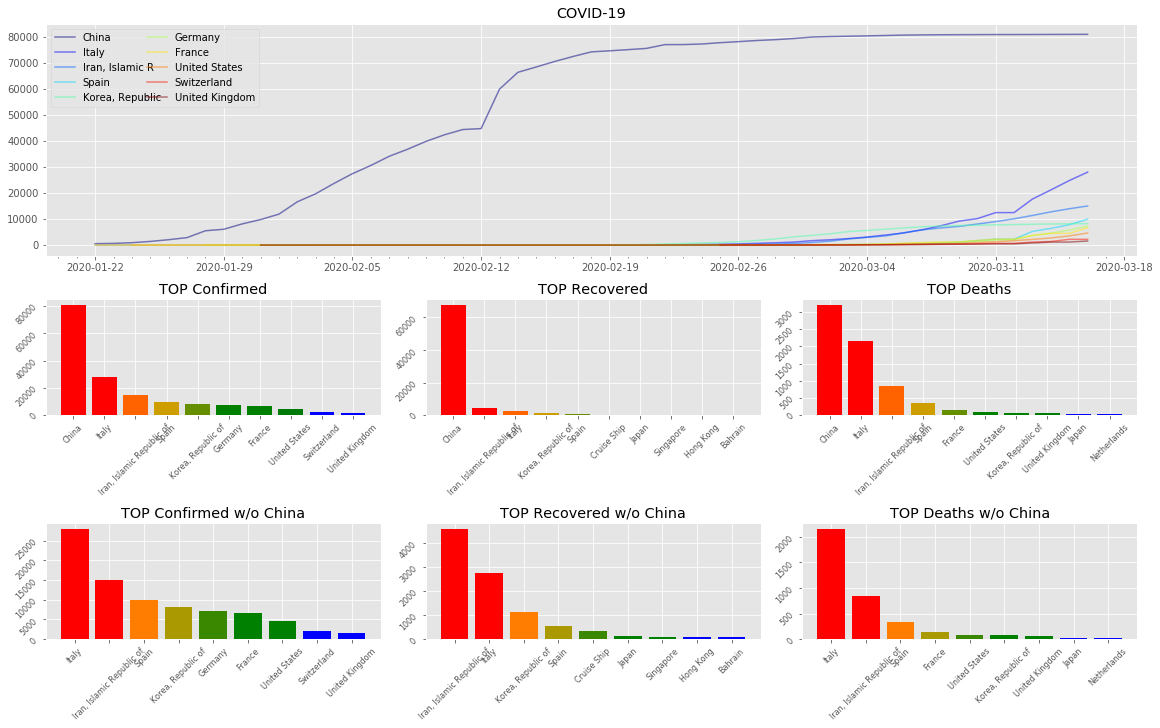

In [144]:
fig = plt.figure(figsize=(16,10),constrained_layout=True)
gs = GridSpec(4, 3, figure=fig)
ax1 = fig.add_subplot(gs[:2, :])
ax2 = fig.add_subplot(gs[2, :1])
ax3 = fig.add_subplot(gs[2, 1:2])
ax4 = fig.add_subplot(gs[2, -1])
ax5 = fig.add_subplot(gs[3, :1])
ax6 = fig.add_subplot(gs[3, 1:2])
ax7 = fig.add_subplot(gs[3, -1])
# Colors
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))
clist = [(0, "red"), (0.125, "red"), (0.25, "orange"), (0.5, "green"), 
         (0.7, "green"), (0.75, "blue"), (1, "blue")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N1 = 10
N2 = 9
x1 = np.arange(N1).astype(float)
x2 = np.arange(N2).astype(float)
y1 = np.random.uniform(0, 5, size=(N1,))
y2 = np.random.uniform(0, 5, size=(N2,))
# Axis 1
for country in top_list:
    ax1.plot(data.loc[country,['Confirmed']],label=country[:15],color=next(colors),alpha=0.5)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax1.xaxis.set_minor_locator(mdates.DayLocator())
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1, 0.20, 0),mode="expand",ncol=2)
ax1.set_title('COVID-19')
# Axis 2, 5
ax2.bar(data_last_report.sort_values(by='Confirmed',ascending=False)['Confirmed'][:10].index.get_level_values(0),data_last_report.sort_values(by='Confirmed',ascending=False)['Confirmed'][:10].values,color=rvb(x1/N1))
ax2.tick_params(labelrotation=45,labelsize=8)
ax2.title.set_text('TOP Confirmed')
ax5.bar(data_last_report.sort_values(by='Confirmed',ascending=False)['Confirmed'][1:10].index.get_level_values(0),data_last_report.sort_values(by='Confirmed',ascending=False)['Confirmed'][1:10].values,color=rvb(x2/N2))
ax5.tick_params(labelrotation=45,labelsize=8)
ax5.title.set_text('TOP Confirmed w/o China')
# Axis 3, 6
ax3.bar(data_last_report.sort_values(by='Recovered',ascending=False)['Recovered'][:10].index.get_level_values(0),data_last_report.sort_values(by='Recovered',ascending=False)['Recovered'][:10].values,color=rvb(x1/N1))
ax3.tick_params(labelrotation=45,labelsize=8)
ax3.title.set_text('TOP Recovered')
ax6.bar(data_last_report.sort_values(by='Recovered',ascending=False)['Recovered'][1:10].index.get_level_values(0),data_last_report.sort_values(by='Recovered',ascending=False)['Recovered'][1:10].values,color=rvb(x2/N2))
ax6.tick_params(labelrotation=45,labelsize=8)
ax6.title.set_text('TOP Recovered w/o China')
# Axis 4, 7
ax4.bar(data_last_report.sort_values(by='Deaths',ascending=False)['Deaths'][:10].index.get_level_values(0),data_last_report.sort_values(by='Deaths',ascending=False)['Deaths'][:10].values,color=rvb(x1/N1))
ax4.tick_params(labelrotation=45,labelsize=8)
ax4.title.set_text('TOP Deaths')
ax7.bar(data_last_report.sort_values(by='Deaths',ascending=False)['Deaths'][1:10].index.get_level_values(0),data_last_report.sort_values(by='Deaths',ascending=False)['Deaths'][1:10].values,color=rvb(x2/N2))
ax7.tick_params(labelrotation=45,labelsize=8)
ax7.title.set_text('TOP Deaths w/o China')

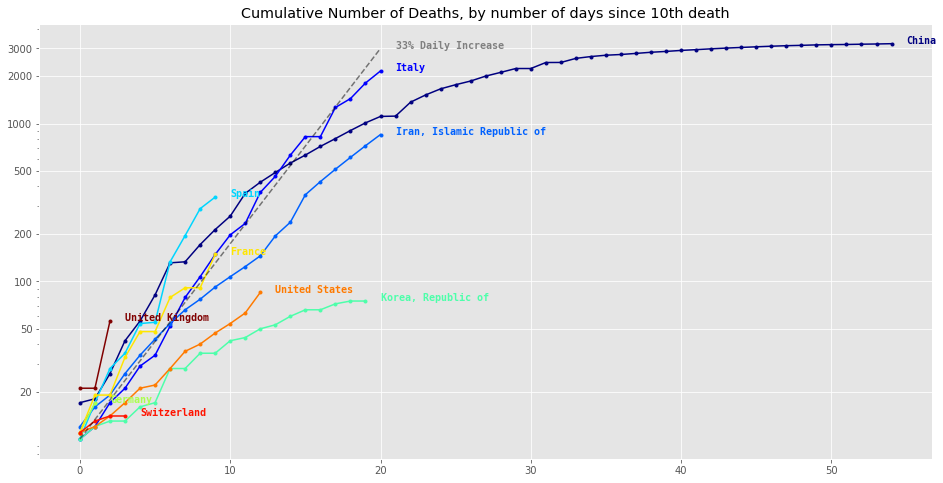

In [145]:
cum_death(top_list,log_scale=True,size=(16,8))

## 6. Map Plot Bokeh

In [146]:
# Paises del Último Report
print('Countries Affected by COVID-19:',len(data_last_report.index.get_level_values(0)))

Countries Affected by COVID-19: 155


In [147]:
coord = pd.read_csv('https://raw.githubusercontent.com/albertyw/avenews/master/old/data/average-latitude-longitude-countries.csv')
coord.head()

,ISO 3166 Country Code,Country,Latitude,Longitude
0,AD,Andorra,42.50,1.50
1,AE,United Arab Emirates,24.00,54.00
2,AF,Afghanistan,33.00,65.00
3,AG,Antigua and Barbuda,17.05,-61.80
4,AI,Anguilla,18.25,-63.17


In [148]:
print(coord[coord['Country'].str.contains('Bahamas')]['Country'].values)

['Bahamas']


In [149]:
countries = data_last_report.index.get_level_values(0).values.tolist()
countries_to_fix = []
for country in countries:
    if country not in coord['Country'].values.tolist():
        print(country+' not in this dataframe')
        countries_to_fix.append(country)
        #print(coord[coord['Country'].str.contains(country)]['Country'].values)

Congo (Brazzaville) not in this dataframe
Congo (Kinshasa) not in this dataframe
Cruise Ship not in this dataframe


In [150]:
maps = pd.merge(data_last_report,coord,on=['Country'])
maps.head()

,Country,Confirmed,Recovered,Deaths,ISO 3166 Country Code,Latitude,Longitude
0,Afghanistan,21.0,1.0,0.0,AF,33.00,65.0
1,Albania,51.0,0.0,1.0,AL,41.00,20.0
2,Algeria,54.0,12.0,4.0,DZ,28.00,3.0
3,Andorra,2.0,1.0,0.0,AD,42.50,1.5
4,Antigua and Barbuda,1.0,0.0,0.0,AG,17.05,-61.8


In [151]:
maps["size"] = np.log(maps["Confirmed"]*100)
maps.plot_bokeh.map(
    x="Longitude",
    y="Latitude",
    size="size",
    hovertool_string="""<h2> @{Country} </h2> 
    
                        <h3> Confirmed: @{Confirmed} </h3>
                        <h3> Recovered: @{Recovered} </h3>
                        <h3> Deaths: @{Deaths} </h3>""",
    tile_provider="CARTODBPOSITRON_RETINA",
    colormap="Plasma",
    colormap_uselog=False,
    marker="circle",
    category="Confirmed",
    legend='Confirmed Cases',
    alpha=0.6,
    figsize=(900, 600),
    title="COVID-19")

Figure(id='1276', ...)

In [152]:
codes = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
codes.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
